<a href="https://colab.research.google.com/github/ykim1103/Deep-Learning/blob/master/%5B%EC%BD%94%EB%93%9C_4_1%5D_BP_mnist_2024_%EB%B0%A9%ED%86%B5%EB%8C%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] 필요한 패키지 불러오기

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras import Sequential, optimizers, callbacks
from tensorflow.keras.layers import Flatten, Dense

[2] 정확도 및 손실함수 시각화 함수 정의

In [ ]:
def plot_metric(h, metric):
    train_history = h.history[metric]
    val_history = h.history['val_'+metric]
    epochs = range(1, len(train_history) + 1)
    plt.plot(epochs, train_history)
    plt.plot(epochs, val_history)
    plt.legend(['training '+metric, 'validation '+metric])
    plt.title('Training and validation ' + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.show()

[3] MNIST 데이터 로드 및 정규화

In [ ]:
# MNIST 데이터베이스에서 훈련용 및 평가용 이미지와 레이블 로드
(train_imgs, train_labels), (test_imgs, test_labels) = \
                                         datasets.mnist.load_data()
# 픽셀 값을 0~1 사이로 정규화
train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0

11490434/11490434 [==============================] - 0s 0us/step


[4] 2층 피드포워드 네트워크 구성

In [ ]:
# 모델 구성 후 요약 정보 출력
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


[5] 모델 컴파일

In [ ]:
# 모델 컴파일
model.compile(optimizer=optimizers.SGD(0.1, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

[6] 모델 학습

In [ ]:
hist = model.fit(train_imgs, train_labels, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 14s 5ms/step - loss: 0.3100 - accuracy: 0.9048 - val_loss: 0.1597 - val_accuracy: 0.9532
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1346 - accuracy: 0.9598 - val_loss: 0.1199 - val_accuracy: 0.9648
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0915 - accuracy: 0.9726 - val_loss: 0.1002 - val_accuracy: 0.9689
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0690 - accuracy: 0.9793 - val_loss: 0.0957 - val_accuracy: 0.9707
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0544 - accuracy: 0.9833 - val_loss: 0.0873 - val_accuracy: 0.9748
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0420 - accuracy: 0.9879 - val_loss: 0.0805 - val_accuracy: 0.9763
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0332 - accuracy: 0.9909 - val_loss: 0.0788 - val_accuracy

[7] 모델의 손실함수 및 정확도 시각화

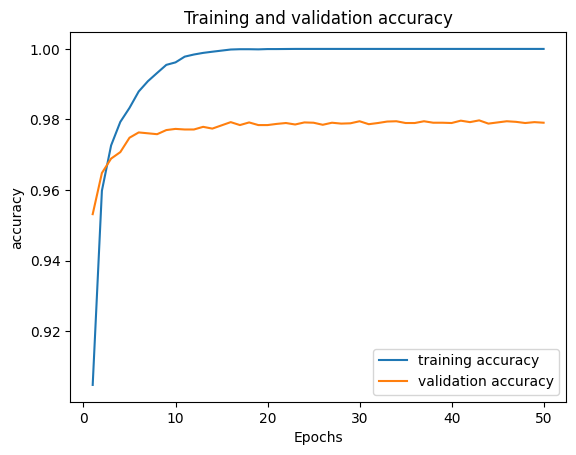

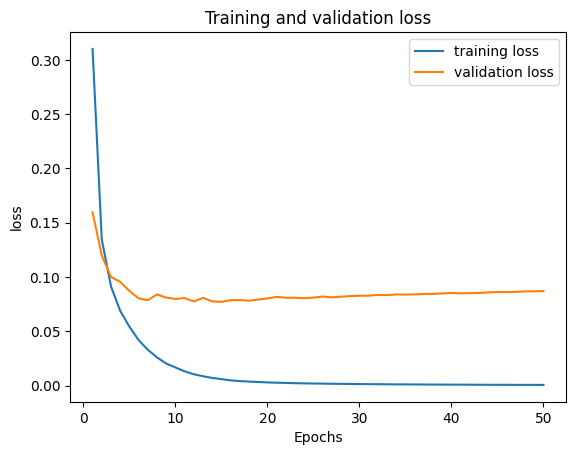

In [ ]:
plot_metric(hist, 'accuracy')
plot_metric(hist, 'loss')

[8] 훈련용 집합 및 검증용 집합에 대한 인식률 출력

In [ ]:
# 훈련 집합을 대상으로 평가
_, train_acc = model.evaluate(train_imgs, train_labels)
print('훈련 데이터 인식률 = ', train_acc)

# 테스트 집합을 대상으로 평가
_, test_acc = model.evaluate(test_imgs, test_labels)
print('테스트 데이터 인식률 = ', test_acc)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0180 - accuracy: 0.9958
훈련 데이터 인식률 =  0.9958166480064392
313/313 [==============================] - 1s 3ms/step - loss: 0.0759 - accuracy: 0.9805
테스트 데이터 인식률 =  0.9804999828338623
